<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/FC_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
    DataSet: MNIST from inbuilt in Keras
    Deep learning Framework: Tensorflow with Keras
    Deep learning Method: Fully Connected only
    Optimizer:SGD with 0.01
    Results: 96 to 98 % Accurate
```
#### Done by shriarul643@gmail.com

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(trainData,trainLabel),(testData,testLabel) = mnist.load_data()
print(trainData.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)

In [4]:
trainData = trainData.reshape(trainData.shape[0],trainData.shape[1]*trainData.shape[2])
testData = testData.reshape(testData.shape[0],testData.shape[1]*testData.shape[2])
trainData = trainData.astype('float32')/255.0
testData = testData.astype('float32')/255.0


In [5]:
trainData.shape

(60000, 784)

In [6]:
model = Sequential([Dense(256,activation='relu',input_shape=(trainData.shape[1],)),
                    Dense(128,activation='relu'),
                    Dense(64,activation='sigmoid'),
                    Dense(10,activation='softmax')])

In [7]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=SGD(0.01))
H = model.fit(trainData,trainLabel,validation_data=(testData,testLabel),epochs=25,batch_size=32,verbose=1)

Epoch 1/25
1875/1875 [==============================] - 6s 2ms/step - loss: 1.8537 - accuracy: 0.5145 - val_loss: 0.6199 - val_accuracy: 0.8637
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5472 - accuracy: 0.8689 - val_loss: 0.3779 - val_accuracy: 0.9028
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.9007 - val_loss: 0.3036 - val_accuracy: 0.9177
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3048 - accuracy: 0.9152 - val_loss: 0.2654 - val_accuracy: 0.9243
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9249 - val_loss: 0.2368 - val_accuracy: 0.9333
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2341 - accuracy: 0.9327 - val_loss: 0.2169 - val_accuracy: 0.9382
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2179 - accuracy: 0.9384 - val_loss: 0.1964 - val_accuracy:

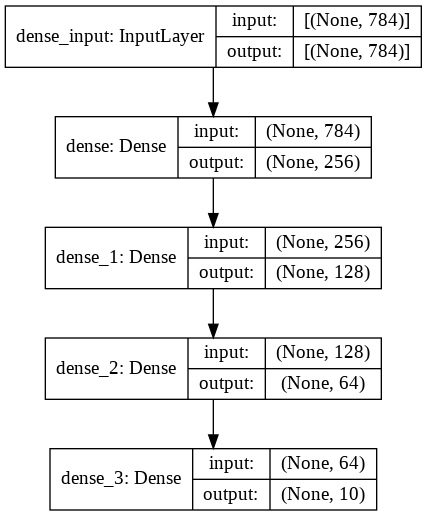

In [8]:
plot_model(model,show_shapes=True)

In [9]:
plt.style.use('ggplot')

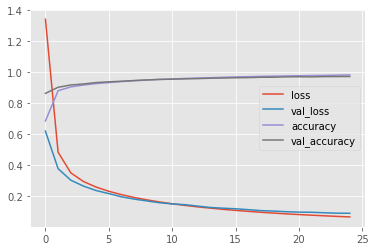

In [10]:
plt.figure()
plt.plot(np.arange(max(H.epoch)+1),H.history['loss'],label='loss')
plt.plot(np.arange(max(H.epoch)+1),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(max(H.epoch)+1),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(max(H.epoch)+1),H.history['val_accuracy'],label='val_accuracy')

plt.legend()
plt.show()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [12]:
predicted = model.predict(testData,batch_size=128,verbose=1)

79/79 [==============================] - 0s 1ms/step


In [13]:
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.95      0.97       892
           6       0.96      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [14]:
_,acc = model.evaluate(testData,testLabel)
print('Accuracy is {:.2f}%'.format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9724
Accuracy is 97.24%


In [15]:
predicted[5]

array([7.5069343e-06, 9.9652821e-01, 3.1579600e-04, 4.7930083e-05,
       4.1588978e-04, 5.6260305e-05, 4.6126494e-05, 2.2399644e-03,
       2.7915344e-04, 6.3158535e-05], dtype=float32)

In [16]:
print('Predicted Label : {} \nActual Label : {}'.format(np.argmax(predicted[5]),np.argmax(testLabel[5])))

Predicted Label : 1 
Actual Label : 1


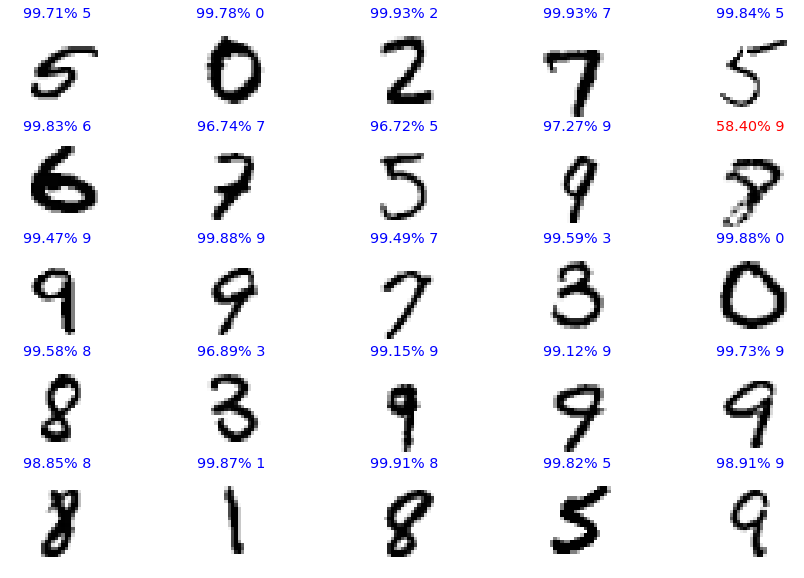

In [22]:
RandomImageIndex = np.random.randint(0,len(testData),(25,))
plt.figure(figsize=(15,10))
for i,j in enumerate(RandomImageIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(testData[j].reshape(28,28),cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  predicted_label = np.argmax(predicted[j])
  true_label = np.argmax(testLabel[j])
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.title("{:.2f}% {}".format(predicted[j].max()*100,predicted_label),color=color)
plt.show()